In [1]:
import numpy as np
import mpmath as mp
import scipy.stats as st
import matplotlib.pyplot as plt
from gvc_measures import *

In [2]:
# matplotlib font settings
plt.rcParams['font.family'] = ['serif']
# file path to save figures
filepath = "C:/Users/Dylan/Documents/King's College London/MSc Dissertation/Figures"

## Covriance & Slope

In [54]:
# covariance function
def covariance(Er, Erp, Errp):
    return (Errp - Er*Erp)/((1-Er)*(1-Erp))

# slope function
def slope(cov, Er, Err):
    return cov*(np.power(1 - Er,2)/(Err - np.power(Er,2)))

## Rank-1 Expectations

In [4]:
# E[r] function
def Er(N,p,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral = mp.quad(integrand, (0, mp.inf))
    return p*c*cF*N*integral

# E[r'] function
def Erp(N,p,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand1(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral1 = mp.quad(integrand1, (0, mp.inf))
    def integrand2(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N)*mp.power(x,aF)*mp.gammainc(-aF,mF*x)
    integral2 = mp.quad(integrand2, (0, mp.inf))
    return p*c*cF*integral1 + p*c*cF*(mp.power(m,1-a)/(a-1))*(N-1)*integral2

# E[rr'] function
def Errp(N,p,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand1(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(2-a,m*x)
    integral1 = mp.quad(integrand1, (0, mp.inf))
    def integrand2(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral2 = mp.quad(integrand2, (0, mp.inf))
    def integrand3(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+2*a-1)*mp.gammainc(-aF,mF*x)*mp.power(mp.gammainc(1-a,m*x),2)
    integral3 = mp.quad(integrand3, (0, mp.inf))
    def integrand4(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral4 = mp.quad(integrand4, (0, mp.inf))
    return p*c*cF*(integral1 + p*c*(mp.power(m,1-a)/(a-1))*(N-1)*integral2 + p*c*(N-1)*integral3 + p*c*(mp.power(m,1-a)/(a-1))*mp.power(N-1,2)*integral4)

# E[r^2] function
def Err(N,p,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand1(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-1)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(2-a,m*x)
    integral1 = mp.quad(integrand1, (0, mp.inf))
    def integrand2(x):
        return mp.power(1-p+p*c*mp.power(x,a)*mp.gammainc(-a,m*x),N-2)*mp.power(x,aF+2*a-1)*mp.gammainc(-aF,mF*x)*mp.power(mp.gammainc(1-a,m*x),2)
    integral2 = mp.quad(integrand2, (0, mp.inf))
    return p*c*cF*N*(integral1 + p*c*(N-1)*integral2)

### Rank-1 Numerical Solutions

In [5]:
# Parameters
N = 100
p = 1
a = 2.5
aF = 1.5
m = 1
mF = 100

# N values
N_min = 10
N_max = 501
N_step = 5

# N array
N_arr = np.arange(N_min, N_max, N_step)
N_num = len(N_arr)

In [6]:
### Effect of N for different p ###

# p values
p_arr = np.array([1, 0.8, 0.1])
p_num = len(p_arr)

# covariance and slope arrays to save results
p_cov = np.zeros(shape=(p_num,N_num))
p_slope = np.zeros(shape=(p_num,N_num))

for i in range(p_num):
    for j in range(N_num):
        res_Er = Er(N_arr[j],p_arr[i],a,aF,m,mF)
        res_Erp = Erp(N_arr[j],p_arr[i],a,aF,m,mF)
        res_Errp = Errp(N_arr[j],p_arr[i],a,aF,m,mF)
        res_Err = Err(N_arr[j],p_arr[i],a,aF,m,mF)
        p_cov[i,j] = covariance(res_Er,res_Erp,res_Errp)
        p_slope[i,j] = slope(p_cov[i,j],res_Er,res_Err)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


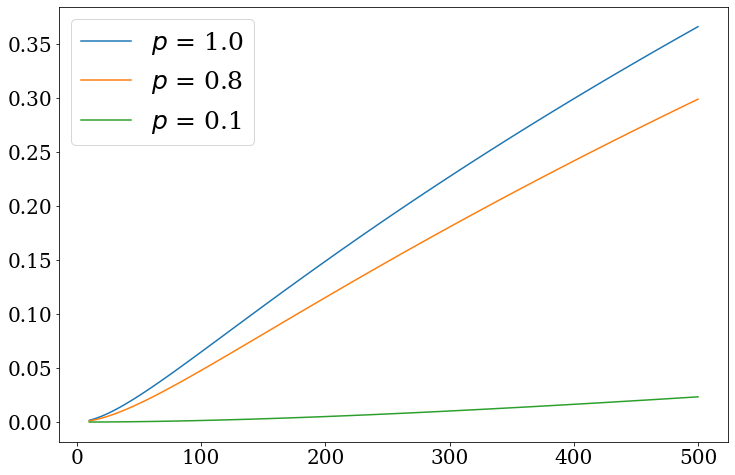

In [7]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(p_num):
    plt.plot(N_arr, p_cov[i], label=r'$p$'f' = {p_arr[i]}')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/Np_cov.pdf")
plt.show()

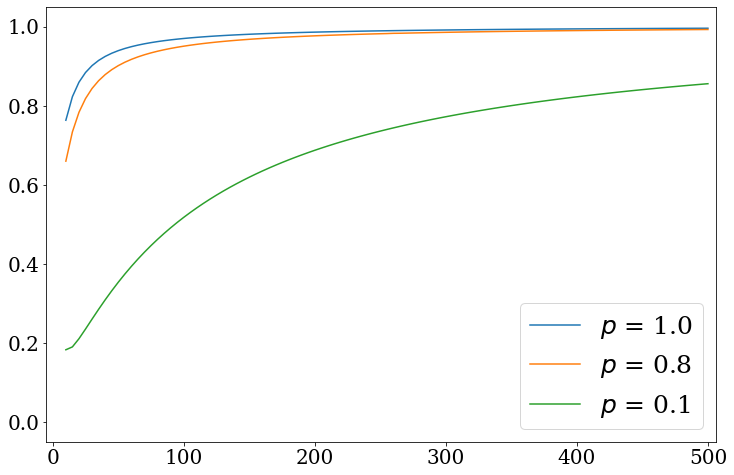

In [8]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(p_num):
    plt.plot(N_arr, p_slope[i], label=r'$p$'f' = {p_arr[i]}')
plt.legend(fontsize=25, loc='lower right')
# x/y limit
plt.ylim([-0.05,1.05])
plt.xlim([-5,N_max+5])
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/Np_slope.pdf")
plt.show()

In [9]:
### Effect of N for different a ###

# no sparsity effect
p = 1

# a array
a_arr = np.array([10.5, a, 0.9])
a_num = len(a_arr)

# covariance and slope arrays to save results
a_cov = np.zeros(shape=(a_num, N_num))
a_slope = np.zeros(shape=(a_num, N_num))

for i in range(a_num):
    for j in range(N_num):
        res_Er = Er(N_arr[j],p,a_arr[i],aF,m,mF)
        res_Erp = Erp(N_arr[j],p,a_arr[i],aF,m,mF)
        res_Errp = Errp(N_arr[j],p,a_arr[i],aF,m,mF)
        res_Err = Err(N_arr[j],p,a_arr[i],aF,m,mF)
        a_cov[i,j] = covariance(res_Er,res_Erp,res_Errp)
        a_slope[i,j] = slope(a_cov[i,j],res_Er,res_Err)

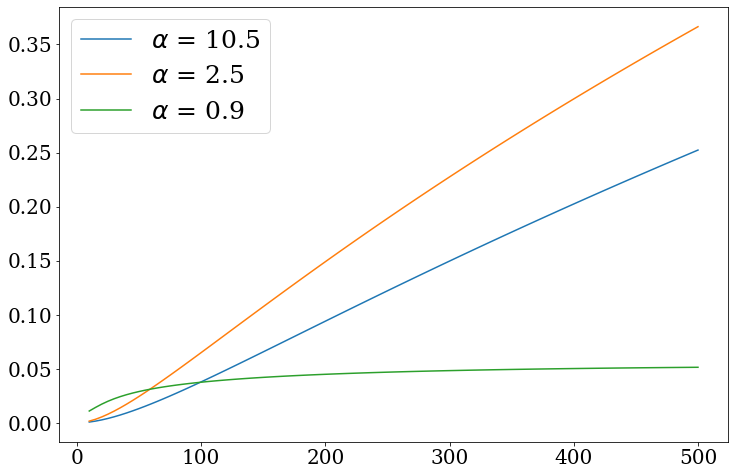

In [10]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(a_num):
    plt.plot(N_arr, a_cov[i], label=r'$\alpha$'f' = {a_arr[i]}')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/Na_cov.pdf")
plt.show()

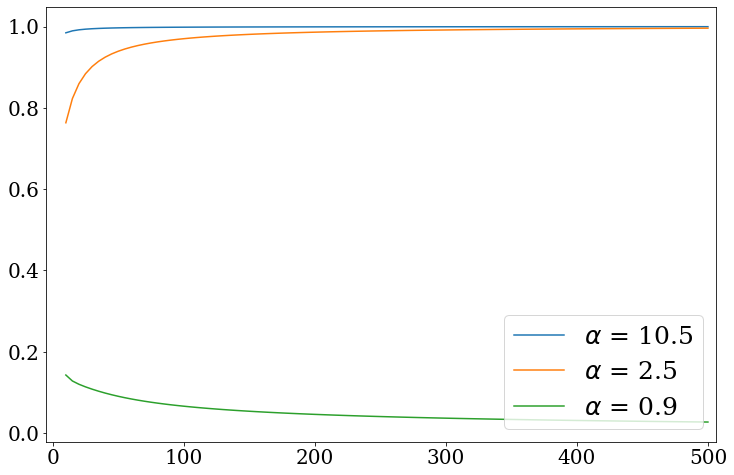

In [11]:
### plot of results ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(a_num):
    plt.plot(N_arr, a_slope[i], label=r'$\alpha$'f' = {a_arr[i]}')
plt.legend(fontsize=25, loc='lower right')
# x/y limit
# plt.ylim([-0.05,1.05])
plt.xlim([-5,N_max+5])
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/Na_slope.pdf")
plt.show()

In [12]:
### Effect of N with varying mF ###

# no sparsity effect
p = 1

# a array
mF_arr = np.array([10, 100, 1000])
mF_num = len(mF_arr)

# covariance and slope arrays to save results
mF_cov = np.zeros(shape=(mF_num, N_num))
mF_slope = np.zeros(shape=(mF_num, N_num))

for i in range(mF_num):
    for j in range(N_num):
        res_Er = Er(N_arr[j],p,a,aF,m,mF_arr[i])
        res_Erp = Erp(N_arr[j],p,a,aF,m,mF_arr[i])
        res_Errp = Errp(N_arr[j],p,a,aF,m,mF_arr[i])
        res_Err = Err(N_arr[j],p,a,aF,m,mF_arr[i])
        mF_cov[i,j] = covariance(res_Er,res_Erp,res_Errp)
        mF_slope[i,j] = slope(mF_cov[i,j],res_Er,res_Err)

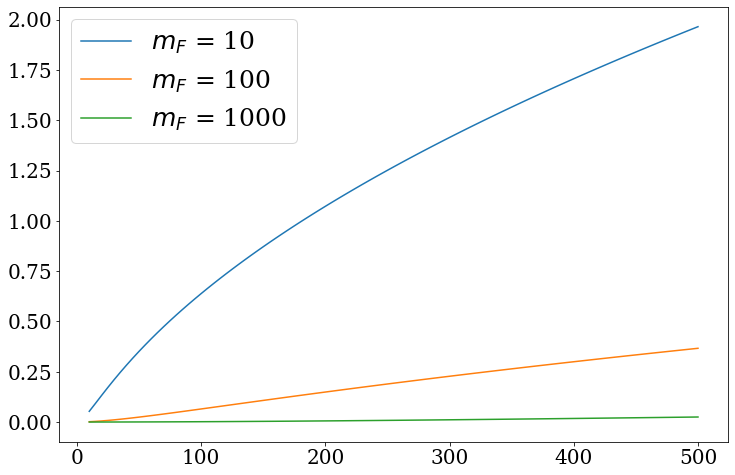

In [13]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different parameter
for i in range(mF_num):
    plt.plot(N_arr, mF_cov[i], label=r'$m_F$'f' = {mF_arr[i]}')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/NmF_cov.pdf")
plt.show()

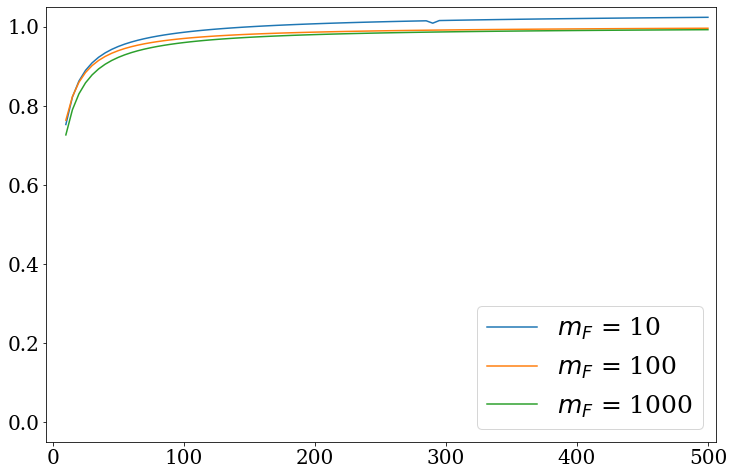

In [14]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different parameter
for i in range(mF_num):
    plt.plot(N_arr, mF_slope[i], label=r'$m_F$'f' = {mF_arr[i]}')
plt.legend(fontsize=25, loc='lower right')
# x/y limit
plt.ylim([-0.05,1.05])
plt.xlim([-5,N_max+5])
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/NmF_slope.pdf")
plt.show()

## Rank-1 Expectations: Limit Large N with p of O(1/N)

In [15]:
# parameters
a = 2.5
aF = 1.5
m = 1
mF = 100

# nu values
v_min = 5
v_max = 501
v_step = 5

# nu array
v_arr = np.arange(v_min, v_max, v_step)
v_num = len(v_arr)

In [16]:
def lim_Er(v,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand(x):
        return mp.exp(v*c*mp.power(x,a)*mp.gammainc(-a,m*x)-v)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral = mp.quad(integrand, (0, mp.inf))
    return v*c*cF*integral

def lim_Erp(v,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand(x):
        return mp.exp(v*c*mp.power(x,a)*mp.gammainc(-a,m*x)-v)*mp.power(x,aF)*mp.gammainc(-aF,mF*x)
    integral = mp.quad(integrand, (0, mp.inf))
    return v*c*cF*(mp.power(m,1-a)/(a-1))*integral

def lim_Errp(v,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand(x):
        return mp.exp(v*c*mp.power(x,a)*mp.gammainc(-a,m*x)-v)*mp.power(x,aF+a)*mp.gammainc(-aF,mF*x)*mp.gammainc(1-a,m*x)
    integral = mp.quad(integrand, (0, mp.inf))
    return mp.power(v,2)*mp.power(c,2)*cF*(mp.power(m,1-a)/(a-1))*integral

def lim_Err(v,a,aF,m,mF):
    c = a*mp.power(m,a)
    cF = aF*mp.power(mF,aF)
    def integrand1(x):
        return mp.exp(v*c*mp.power(x,a)*mp.gammainc(-a,m*x)-v)*mp.power(x,aF+a-1)*mp.gammainc(-aF,mF*x)*mp.gammainc(2-a,m*x)
    integral1 = mp.quad(integrand1, (0, mp.inf))
    def integrand2(x):
        return mp.exp(v*c*mp.power(x,a)*mp.gammainc(-a,m*x)-v)*mp.power(x,aF+2*a-1)*mp.gammainc(-aF,mF*x)*mp.power(mp.gammainc(1-a,m*x),2)
    integral2 = mp.quad(integrand2, (0, mp.inf))
    return v*c*cF*integral1 + mp.power(v,2)*mp.power(c,2)*cF*integral2

In [17]:
### Effect of v different a ###

# a array
a_lim_arr = np.array([10.5, a, 0.9])
a_lim_num = len(a_arr)

# covariance and slope arrays to save results
a_lim_cov = np.zeros(shape=(a_lim_num, v_num))
a_lim_slope = np.zeros(shape=(a_lim_num, v_num))

for i in range(a_num):
    for j in range(v_num):
        res_lim_Er = lim_Er(v_arr[j],a_lim_arr[i],aF,m,mF)
        res_lim_Erp = lim_Erp(v_arr[j],a_lim_arr[i],aF,m,mF)
        res_lim_Errp = lim_Errp(v_arr[j],a_lim_arr[i],aF,m,mF)
        res_lim_Err = lim_Err(v_arr[j],a_lim_arr[i],aF,m,mF)
        a_lim_cov[i,j] = covariance(res_lim_Er,res_lim_Erp,res_lim_Errp)
        a_lim_slope[i,j] = slope(a_lim_cov[i,j],res_lim_Er,res_lim_Err)

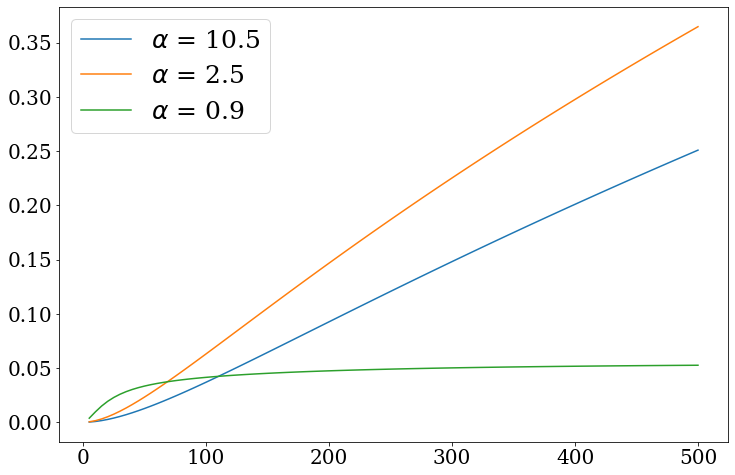

In [18]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(a_lim_num):
    plt.plot(v_arr, a_lim_cov[i], label=r'$\alpha$'f' = {a_arr[i]}')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$\nu$', fontsize=30)
plt.savefig(f"{filepath}/va_cov.pdf")
plt.show()

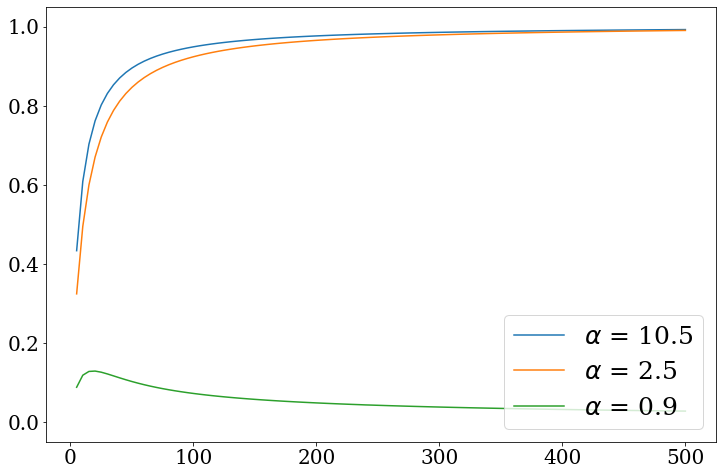

In [19]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(a_lim_num):
    plt.plot(v_arr, a_lim_slope[i], label=r'$\alpha$'f' = {a_arr[i]}')
plt.legend(fontsize=25, loc='lower right')
# y-axis limit
plt.ylim([-0.05,1.05])
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$\nu$', fontsize=30)
plt.savefig(f"{filepath}/va_slope.pdf")
plt.show()

In [20]:
### Effect of v different a ###

# a array
mF_lim_arr = np.array([10, 100, 1000])
mF_lim_num = len(a_arr)

# covariance and slope arrays to save results
mF_lim_cov = np.zeros(shape=(a_num, v_num))
mF_lim_slope = np.zeros(shape=(a_num, v_num))

for i in range(mF_lim_num):
    for j in range(v_num):
        res_lim_Er = lim_Er(v_arr[j],a,aF,m,mF_lim_arr[i])
        res_lim_Erp = lim_Erp(v_arr[j],a,aF,m,mF_lim_arr[i])
        res_lim_Errp = lim_Errp(v_arr[j],a,aF,m,mF_lim_arr[i])
        res_lim_Err = lim_Err(v_arr[j],a,aF,m,mF_lim_arr[i])
        mF_lim_cov[i,j] = covariance(res_lim_Er,res_lim_Erp,res_lim_Errp)
        mF_lim_slope[i,j] = slope(mF_lim_cov[i,j],res_lim_Er,res_lim_Err)

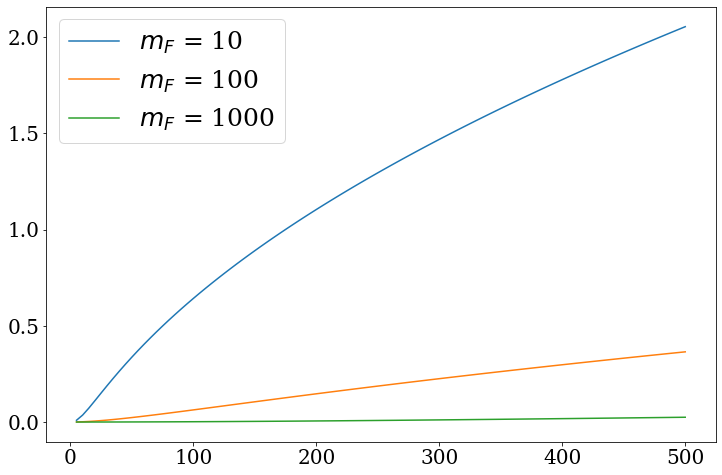

In [21]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(mF_lim_num):
    plt.plot(v_arr, mF_lim_cov[i], label=r'$m_F$'f' = {mF_arr[i]}')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$\nu$', fontsize=30)
plt.savefig(f"{filepath}/vmF_cov.pdf")
plt.show()

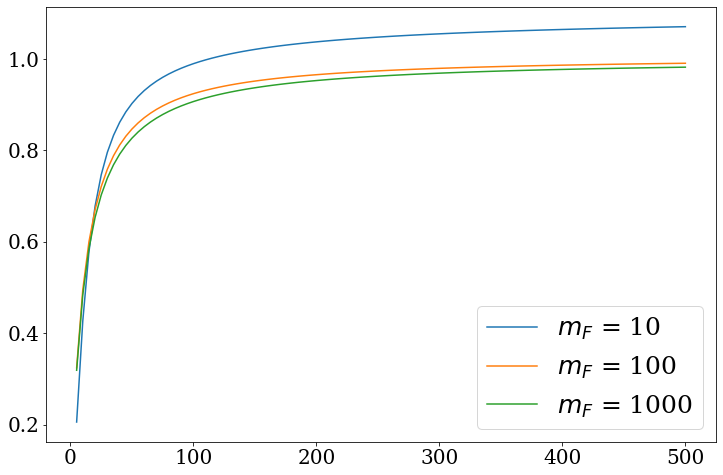

In [22]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
for i in range(mF_lim_num):
    plt.plot(v_arr, mF_lim_slope[i], label=r'$m_F$'f' = {mF_arr[i]}')
plt.legend(fontsize=25, loc='lower right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$\nu$', fontsize=30)
plt.savefig(f"{filepath}/vmF_slope.pdf")
plt.show()

## Theoretic vs Simulation

### Rank-1 Theoretic vs Rank-1 Simulation

In [25]:
# parameters 
a = 2.5
aF = 1.5
m = 1
mF = 100
M = 500 # number of simulations for each N

In [ ]:
### Rank-1 theoretic vs numerical simulation of cov and slope: no sparsity ###

# covariance and slope arrays to save results
sim_cov = np.zeros(shape=N_num)
sim_slope = np.zeros(shape=N_num)

for i, n in enumerate(N_arr):
    n = int(n)
    # rank-1 estimation arrays
    r = np.zeros(shape=(M))
    rp = np.zeros(shape=(M))
    rr = np.zeros(shape=(M))
    rrp = np.zeros(shape=(M))
    for j in range(M):
        # random input use matrix
        A = st.pareto.rvs(b=a, scale=m, size=(n,n))
        # Random final demand vector
        F = st.pareto.rvs(b=aF, scale=mF, size=n)
        # output vector
        y = A.sum(axis=1) + F
        # Calculate inverse diagonal matrix of y
        y_inv = np.divide(1, y, out=np.zeros(y.shape), where=y!=0)
        Y_inv = np.diag(y_inv)
        # Calculate Au matrix
        Au = (Y_inv@A)
        # Calculate Ad matrix
        Ad = (A@Y_inv).T
        # rank 1 estimations
        r[j] = Au[0].sum()
        rp[j] = Ad[0].sum()
        rr[j] = r[j]*r[j]
        rrp[j] = r[j]*rp[j]
    # non-fluctuating averages
    sim_Er = r.mean()
    sim_Erp = rp.mean()
    sim_Err = rr.mean()
    sim_Errp = rrp.mean()
    # covariance and slope
    sim_cov[i] = covariance(sim_Er,sim_Erp,sim_Errp)
    sim_slope[i] = slope(sim_cov[i],sim_Er,sim_Err)
    print(f"progress: {round((i/N_num)*100,2)}%", end="\r")

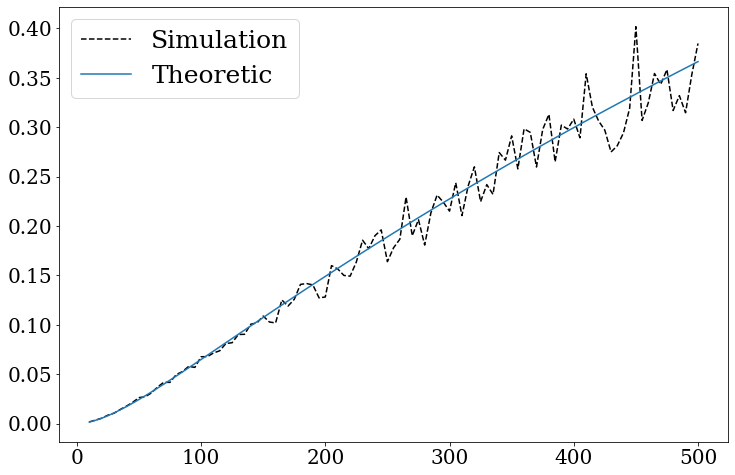

In [27]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, sim_cov, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_cov[0], label=f'Theoretic')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_cov.pdf")
plt.show()

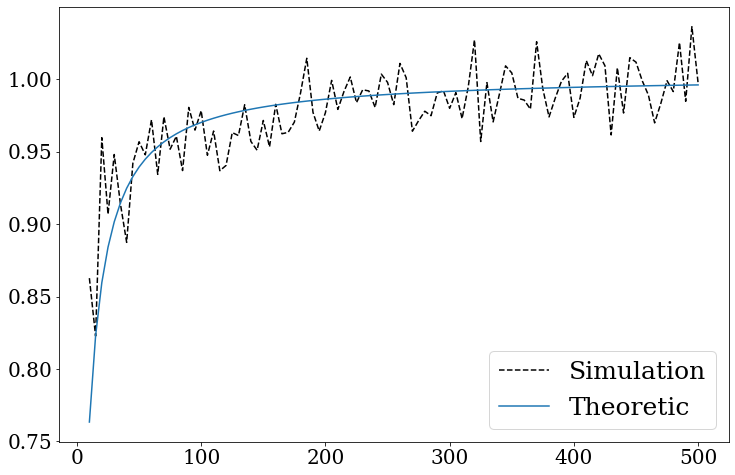

In [28]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, sim_slope, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_slope[0], label=f'Theoretic')
plt.legend(fontsize=25, loc='lower right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_slope.pdf")
plt.show()

In [29]:
### Rank-1 theoretic vs numerical simulation of cov and slope: high sparsity ###

p = p_arr[-1]

# covariance and slope arrays to save results
sparse_sim_cov = np.zeros(shape=N_num)
sparse_sim_slope = np.zeros(shape=N_num)

# rank-1 estimation arrays
r = np.zeros(shape=(N_num,M))
rp = np.zeros(shape=(N_num,M))
rr = np.zeros(shape=(N_num,M))
rrp = np.zeros(shape=(N_num,M))

for i, n in enumerate(N_arr):
    n = int(n)
    for j in range(M):
        # sparse matrix
        S = np.random.choice([0, 1], size=(n,n),p=[1-p,p])
        # random input use matrix
        A = st.pareto.rvs(b=a, scale=m, size=(n,n))*S
        # Random final demand vector
        F = st.pareto.rvs(b=aF, scale=mF, size=n)
        # output vector
        y = A.sum(axis=1) + F
        # Calculate inverse diagonal matrix of y
        y_inv = np.divide(1, y, out=np.zeros(y.shape), where=y!=0)
        Y_inv = np.diag(y_inv)
        # Calculate Au matrix
        Au = (Y_inv@A)
        # Calculate Ad matrix
        Ad = (A@Y_inv).T
        # rank 1 estimations
        r[i,j] = Au[0].sum()
        rp[i,j] = Ad[0].sum()
        rr[i,j] = r[i,j]*r[i,j]
        rrp[i,j] = r[i,j]*rp[i,j]
    # non-fluctuating averages
    sim_Er = r[i].mean()
    sim_Erp = rp[i].mean()
    sim_Err = rr[i].mean()
    sim_Errp = rrp[i].mean()
    # covariance and slope
    sparse_sim_cov[i] = covariance(sim_Er,sim_Erp,sim_Errp)
    sparse_sim_slope[i] = slope(sparse_sim_cov[i],sim_Er,sim_Err)
    print(f"progress: {round((i/N_num)*100,2)}%", end="\r")

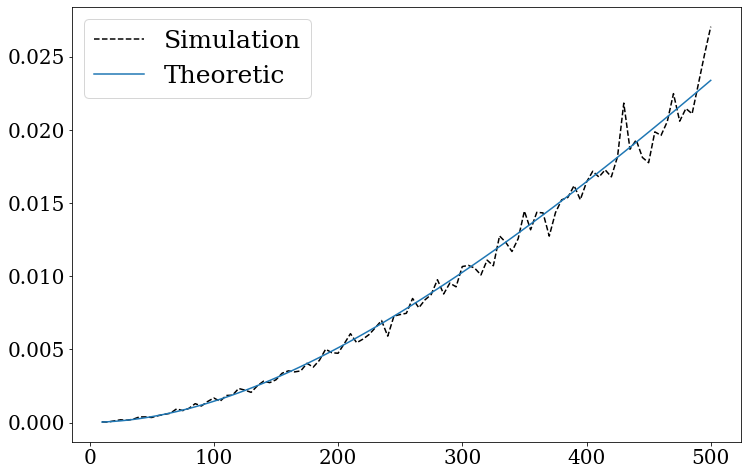

In [30]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, sparse_sim_cov, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_cov[-1], label=f'Theoretic')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_sparse_cov.pdf")
plt.show()

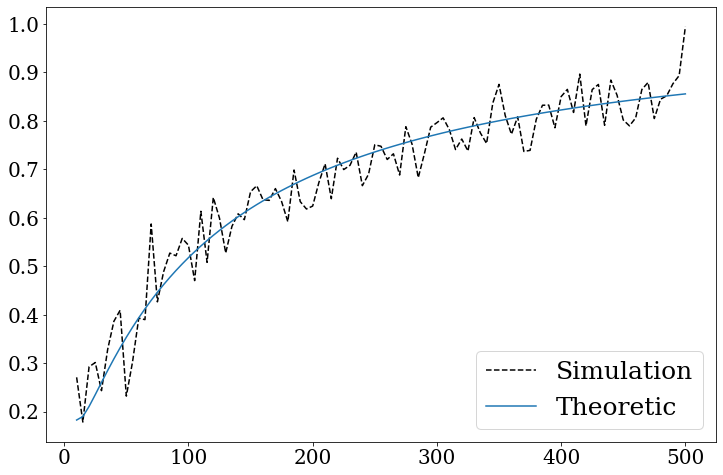

In [31]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, sparse_sim_slope, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_slope[-1], label=f'Theoretic')
plt.legend(fontsize=25, loc='lower right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_sparse_slope.pdf")
plt.show()

### Rank-1 Theoretic vs Actual Simulation 

In [32]:
# parameters
a = 2.5
aF = 1.5
m = 1
mF = 100
M = 500 # number of simulations for each N

In [33]:
### Rank-1 theoretic vs actual numerical simulation of cov and slope: no sparsity ###

# covariance and slope arrays to save results
actual_sim_cov = np.zeros(shape=N_num)
actual_sim_slope = np.zeros(shape=N_num)

for i, n in enumerate(N_arr):
    n = int(n)
    u1 = np.zeros(shape=M)
    d1 = np.zeros(shape=M)
    u1u1 = np.zeros(shape=M)
    u1d1 = np.zeros(shape=M)
    for j in range(M):
        # random input use matrix
        A = st.pareto.rvs(b=a, scale=m, size=(n,n))
        # Random final demand vector
        F = st.pareto.rvs(b=aF, scale=mF, size=n)
        # output vector
        y = A.sum(axis=1) + F
        # Calculate upstreamness & downstreamness
        U = upstreamness(A, y)
        D = downstreamness(A, y)
        # first element of U and D
        u1[j] = U[0]
        d1[j] = D[0]
        u1u1[j] = u1[j]*u1[j]
        u1d1[j] = u1[j]*d1[j]
    # non-fluctuating averages
    sim_Eu1 = u1.mean()
    sim_Ed1 = d1.mean()
    sim_Eu1u1 = u1u1.mean()
    sim_Eu1d1 = u1d1.mean()
    # covariance and slope
    actual_sim_cov[i] = sim_Eu1d1 - sim_Eu1*sim_Ed1
    actual_sim_slope[i] = actual_sim_cov[i]/(sim_Eu1u1 - sim_Eu1*sim_Eu1)
    print(f"progress: {round((i/N_num)*100,2)}%", end="\r")

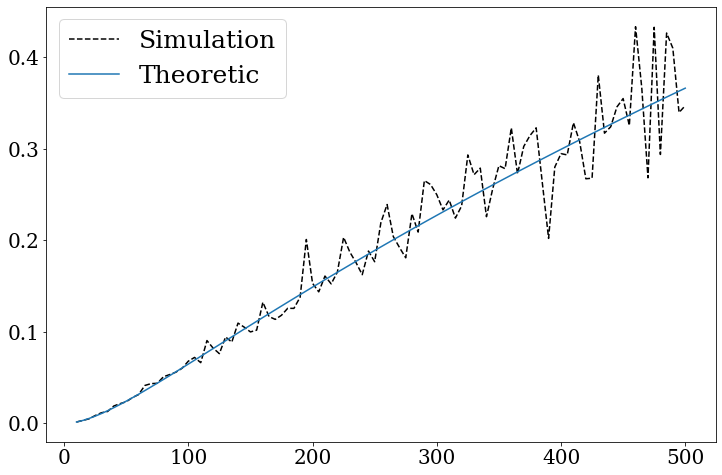

In [39]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, actual_sim_cov, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_cov[0], label=f'Theoretic')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/actual_sim_cov.pdf")
plt.show()

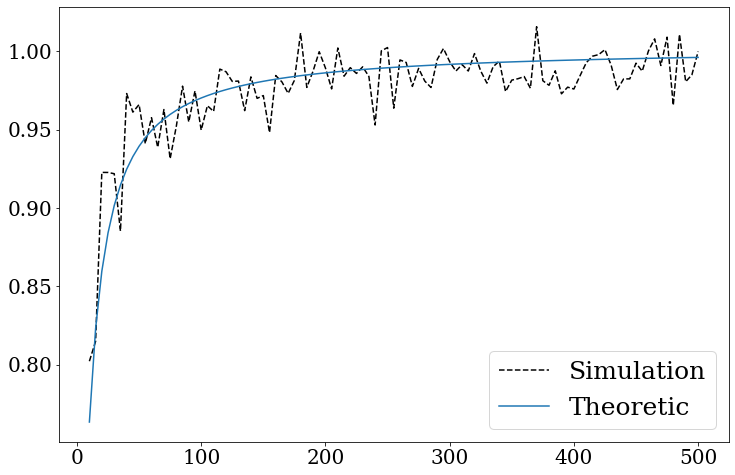

In [35]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, actual_sim_slope, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_slope[0], label=f'Theoretic')
plt.legend(fontsize=25, loc='lower right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/actual_sim_slope.pdf")
plt.show()

In [36]:
### Rank-1 theoretic vs actual numerical simulation of cov and slope: high sparsity ###

p = p_arr[-1]

# covariance and slope arrays to save results
actual_sparse_sim_cov = np.zeros(shape=N_num)
actual_sparse_sim_slope = np.zeros(shape=N_num)

for i, n in enumerate(N_arr):
    n = int(n)
    u1 = np.zeros(shape=M)
    d1 = np.zeros(shape=M)
    u1u1 = np.zeros(shape=M)
    u1d1 = np.zeros(shape=M)
    for j in range(M):
        # sparse matrix
        S = np.random.choice([0, 1], size=(n,n),p=[1-p,p])
        # random input use matrix
        A = st.pareto.rvs(b=a, scale=m, size=(n,n))*S
        # Random final demand vector
        F = st.pareto.rvs(b=aF, scale=mF, size=n)
        # output vector
        y = A.sum(axis=1) + F
        # Calculate upstreamness & downstreamness
        U = upstreamness(A, y)
        D = downstreamness(A, y)
        # rank 1 estimations
        u1[j] = U[0]
        d1[j] = D[0]
        u1u1[j] = u1[j]*u1[j]
        u1d1[j] = u1[j]*d1[j]
    # non-fluctuating averages
    sim_Eu1 = u1.mean()
    sim_Ed1 = d1.mean()
    sim_Eu1u1 = u1u1.mean()
    sim_Eu1d1 = u1d1.mean()
    # covariance and slope
    actual_sparse_sim_cov[i] = sim_Eu1d1 - sim_Eu1*sim_Ed1
    actual_sparse_sim_slope[i] = actual_sparse_sim_cov[i]/(sim_Eu1u1 - sim_Eu1*sim_Eu1)
    print(f"progress: {round((i/N_num)*100,2)}%", end="\r")

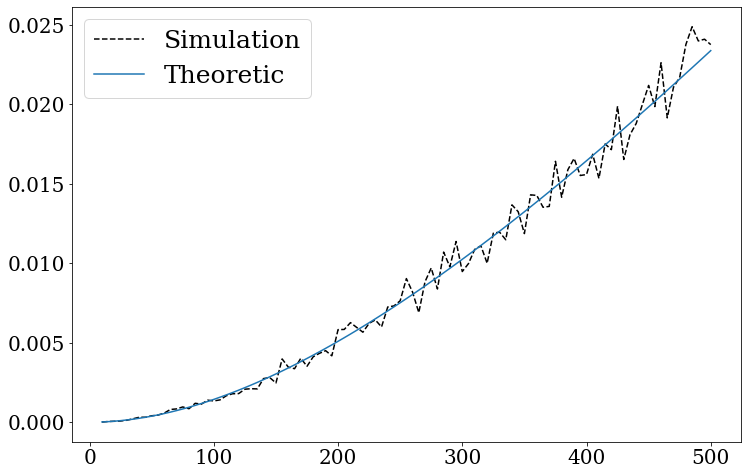

In [40]:
### covariance plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, actual_sparse_sim_cov, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_cov[-1], label=f'Theoretic')
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Covariance', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/actual_sparse_sim_cov.pdf")
plt.show()

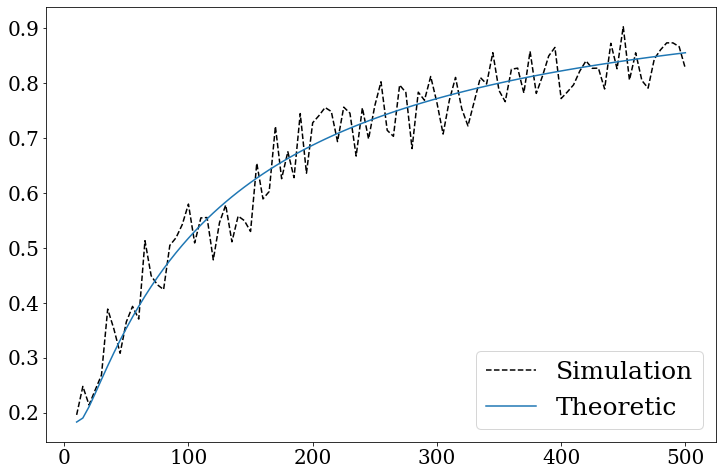

In [41]:
### slope plot ###
plt.figure(figsize=(12,8))
# plot each slope values for different a parameter
plt.plot(N_arr, actual_sparse_sim_slope, color='k', linestyle='--', label=f'Simulation')
plt.plot(N_arr, p_slope[-1], label=f'Theoretic')
plt.legend(fontsize=25, loc='lower right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Slope', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
# plt.savefig(f"{filepath}/actual_sparse_sim_slope.pdf")
plt.show()

### Mean Squared Error

In [42]:
# parameters
n = int(100/N_step) # lookback period

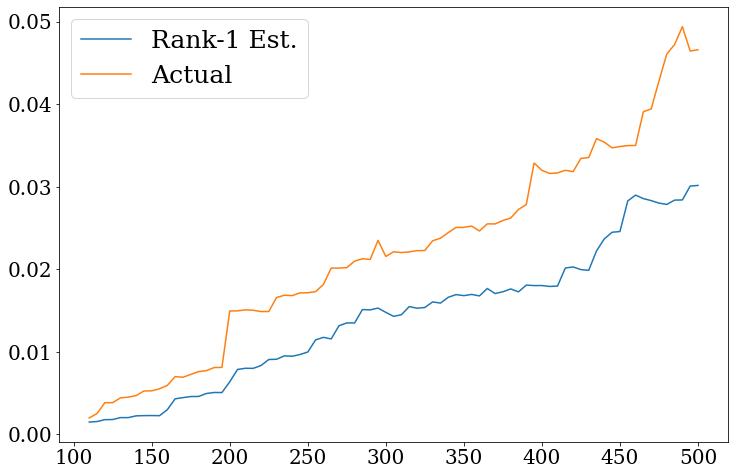

In [48]:
### Rolling Root Mean Squared Error (RMSE) of theoretic covariance for simulated rank-1 & actual: no sparsity ###

# rmse array
cov_rmse = np.zeros(shape=N_num)
actual_cov_rmse = np.zeros(shape=N_num)

for i in range(n,N_num):
    # rank-1 error
    error = sim_cov[i-n:i] - p_cov[0][i-n:i]
    # actual error
    actual_error = actual_sim_cov[i-n:i] - p_cov[0][i-n:i]
    # rmse of cov
    cov_rmse[i] = np.sqrt((1/n)*(error.T@error))
    actual_cov_rmse[i] = np.sqrt((1/n)*(actual_error.T@actual_error))

### covariance RMSE plot ###
plt.figure(figsize=(12,8))
plt.plot(N_arr[n:], cov_rmse[n:], label='Rank-1 Est.')
plt.plot(N_arr[n:], actual_cov_rmse[n:], label='Actual')
# legend
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Rolling RMSE', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_cov_rmse.pdf")
plt.show()

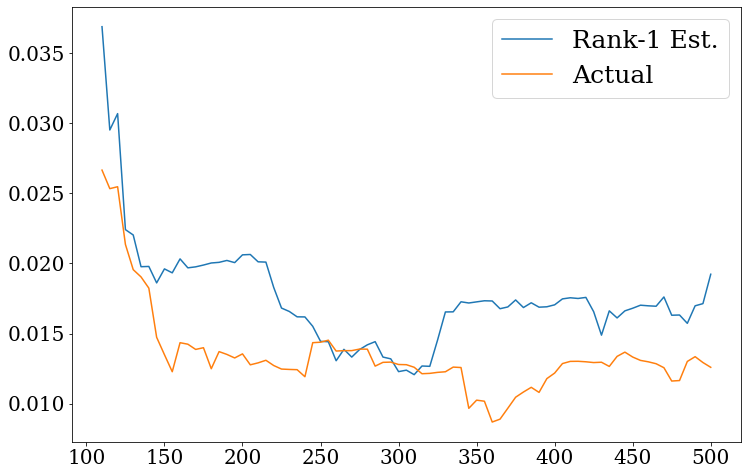

In [49]:
### Rolling Root Mean Squared Error (RMSE) of theoretic slope for simulated rank-1 & actual: no sparsity ###

# rmse array
slope_rmse = np.zeros(shape=N_num)
actual_slope_rmse = np.zeros(shape=N_num)

for i in range(n,N_num):
    # rank-1 error
    error = sim_slope[i-n:i] - p_slope[0][i-n:i]
    # actual error
    actual_error = actual_sim_slope[i-n:i] - p_slope[0][i-n:i]
    # rmse of cov
    slope_rmse[i] = np.sqrt((1/n)*(error.T@error))
    actual_slope_rmse[i] = np.sqrt((1/n)*(actual_error.T@actual_error))

### covariance RMSE plot ###
plt.figure(figsize=(12,8))
plt.plot(N_arr[n:], slope_rmse[n:], label='Rank-1 Est.')
plt.plot(N_arr[n:], actual_slope_rmse[n:], label='Actual')
# legend
plt.legend(fontsize=25, loc='upper right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Rolling RMSE', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_slope_rmse.pdf")
plt.show()

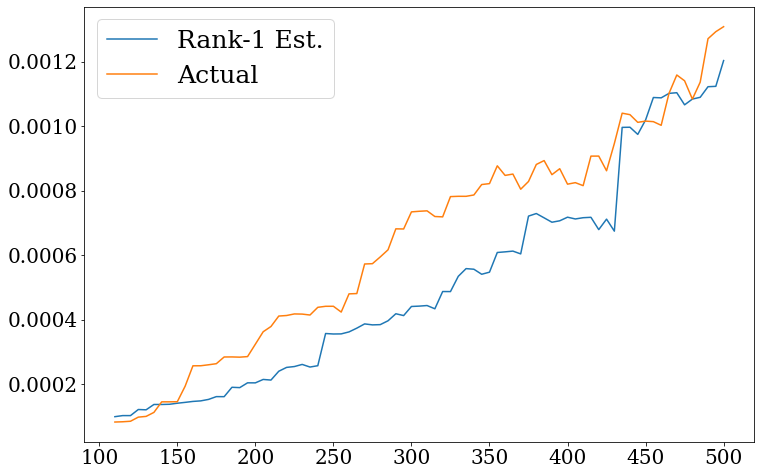

In [51]:
### Rolling Root Mean Squared Error (RMSE) of theoretic covariance for simulated rank-1 & actual: high sparsity ###

# rmse array
cov_sparse_rmse = np.zeros(shape=N_num)
actual_cov_sparse_rmse = np.zeros(shape=N_num)

for i in range(n,N_num):
    # rank-1 error
    error = sparse_sim_cov[i-n:i] - p_cov[-1][i-n:i]
    # actual error
    actual_error = actual_sparse_sim_cov[i-n:i] - p_cov[-1][i-n:i]
    # rmse of cov
    cov_sparse_rmse[i] = np.sqrt((1/n)*(error.T@error))
    actual_cov_sparse_rmse[i] = np.sqrt((1/n)*(actual_error.T@actual_error))

### covariance RMSE plot ###
plt.figure(figsize=(12,8))
plt.plot(N_arr[n:], cov_sparse_rmse[n:], label='Rank-1 Est.')
plt.plot(N_arr[n:], actual_cov_sparse_rmse[n:], label='Actual')
# legend
plt.legend(fontsize=25, loc='upper left')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Rolling RMSE', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_cov_sparse_rmse.pdf")
plt.show()

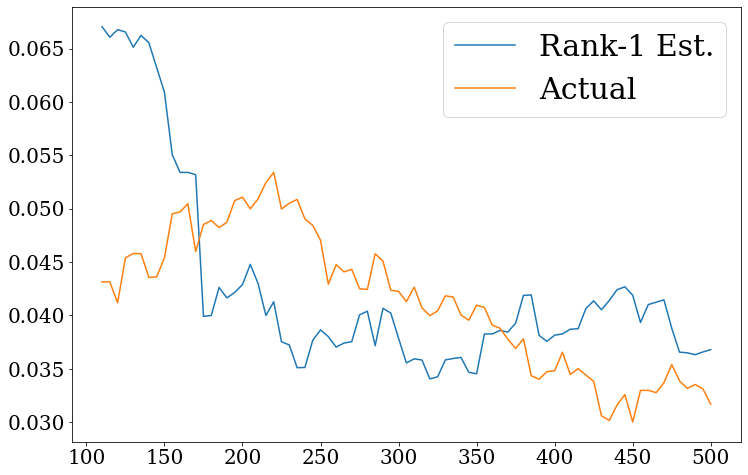

In [52]:
### Rolling Root Mean Squared Error (RMSE) of theoretic slope for simulated rank-1 & actual: high sparsity ###

# rmse array
slope_sparse_rmse = np.zeros(shape=N_num)
actual_slope_sparse_rmse = np.zeros(shape=N_num)

for i in range(n,N_num):
    # rank-1 error
    error = sparse_sim_slope[i-n:i] - p_slope[-1][i-n:i]
    # actual error
    actual_error = actual_sparse_sim_slope[i-n:i] - p_slope[-1][i-n:i]
    # rmse of cov
    slope_sparse_rmse[i] = np.sqrt((1/n)*(error.T@error))
    actual_slope_sparse_rmse[i] = np.sqrt((1/n)*(actual_error.T@actual_error))

### covariance RMSE plot ###
plt.figure(figsize=(12,8))
plt.plot(N_arr[n:], slope_sparse_rmse[n:], label='Rank-1 Est.')
plt.plot(N_arr[n:], actual_slope_sparse_rmse[n:], label='Actual')
# legend
plt.legend(fontsize=30, loc='upper right')
# tick size
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.ylabel('Rolling RMSE', fontsize=30)
# plt.xlabel(r'$N$', fontsize=30)
plt.savefig(f"{filepath}/sim_sparse_slope_rmse.pdf")
plt.show()